# Experimentação de modelos

## Métricas
- MAPE

## Dependências


In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sktime.split import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.arima import ARIMA
from sktime.utils.plotting import plot_series
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from xgboost import XGBRegressor
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

## Variáveis globais

In [3]:
PATH = '../data/historico_acoes_b3.csv'
TICKER = 'BBAS3.SA'

## Leitura dos dados

In [4]:
df = pd.read_csv(PATH)
df = df[df.Ticker == TICKER][['Date', 'Adj Close']]
df.index = pd.to_datetime(df.Date)
df = df.drop(columns=['Date'])

df = df.asfreq('B')  # 'B' para dias úteis
df['Adj Close'] = df['Adj Close'].fillna(method='ffill')  # Preenche valores ausentes com o último valor conhecido

display(df.head())

,Adj Close
Date,
2000-01-03 00:00:00+00:00,0.504046
2000-01-04 00:00:00+00:00,0.480073
2000-01-05 00:00:00+00:00,0.484991
2000-01-06 00:00:00+00:00,0.491752
2000-01-07 00:00:00+00:00,0.480688


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Adj Close'>)

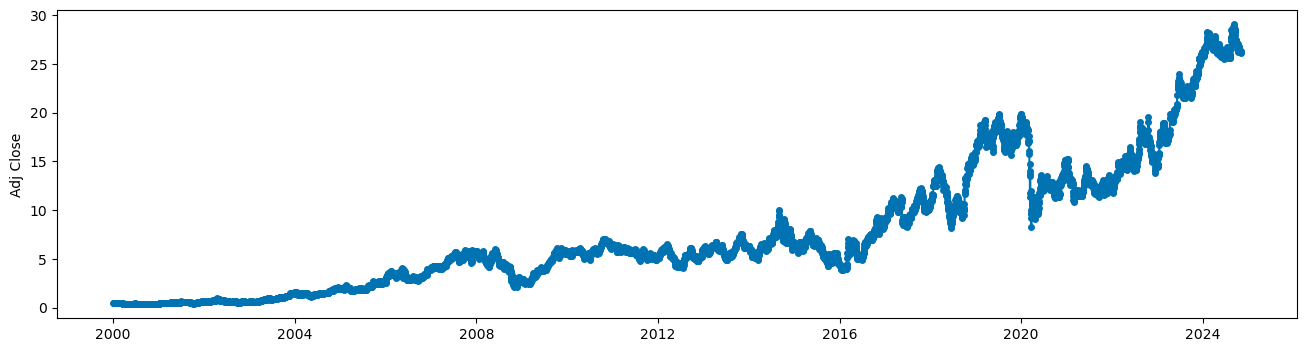

In [5]:
plot_series(df)

## ARIMA

In [6]:
y_train, y_test = temporal_train_test_split(df['Adj Close'], test_size=0.2)

In [7]:
class SKTimeForecaster:
    """ Classe com métodos de forecasting que podem ser utilizados para qualquer modelo do sktime """
    
    def __init__(self):
        pass
    
    def evaluate_forecast(self, y, y_pred):
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        mape = mean_absolute_percentage_error(y, y_pred)
        return {'mae': mae, 'mse': mse, 'mape': mape}

    def train_model(self, y_train, model, evaluate=False, horizon=365, y_test=None):
        fh = ForecastingHorizon(np.arange(1, horizon + 1), is_relative=True)

        model.fit(y_train)
        y_pred = model.predict(fh)
        
        if evaluate:
            print(self.evaluate_forecast(y_test, y_pred))
        
        return y_pred

### Treinamento e validação do modelo

{'mae': 4.736718955261865, 'mse': 32.33995218621436, 'mape': 0.2720468987708067}


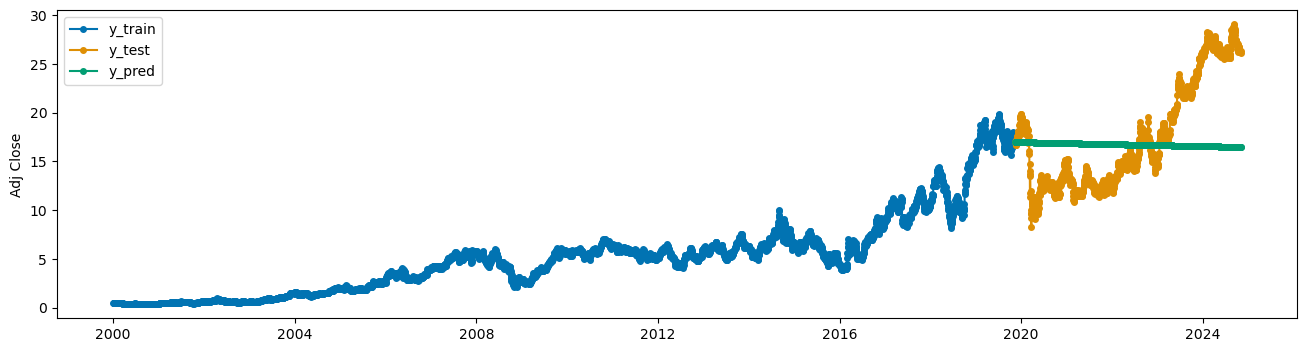

In [8]:
model = ARIMA(order=(1,0,3))

y_test_pred = SKTimeForecaster().train_model(y_train, model, evaluate=True, y_test=y_test, horizon=len(y_test))

plot_series(y_train, y_test, y_test_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

### Treinamento com dados completos

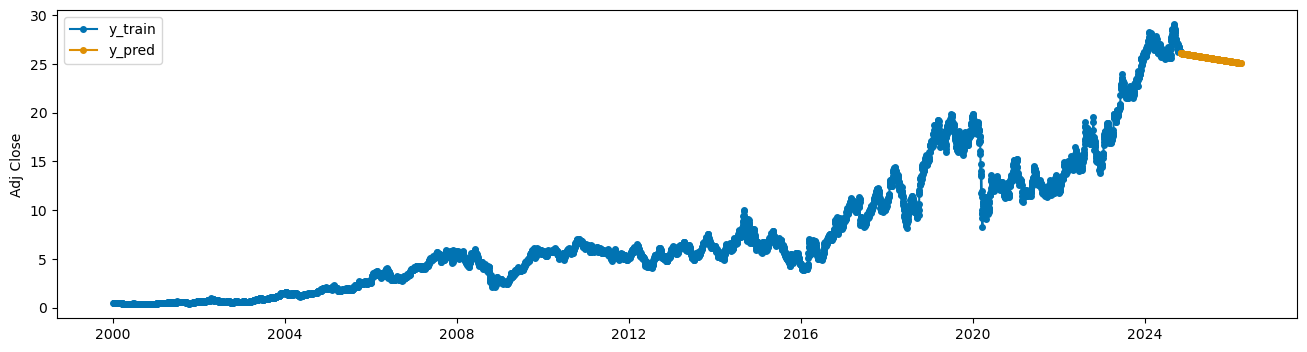

In [9]:
model = ARIMA()

y_pred = SKTimeForecaster().train_model(df['Adj Close'], model, horizon=365)

plot_series(df['Adj Close'], y_pred, labels=['y_train', 'y_pred'])
plt.show()

### Auto-ARIMA

c:\Users\ubfil\anaconda3\envs\stocks_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'mae': 4.39881204884725, 'mse': 23.313679884351913, 'mape': 0.28746604011270016}


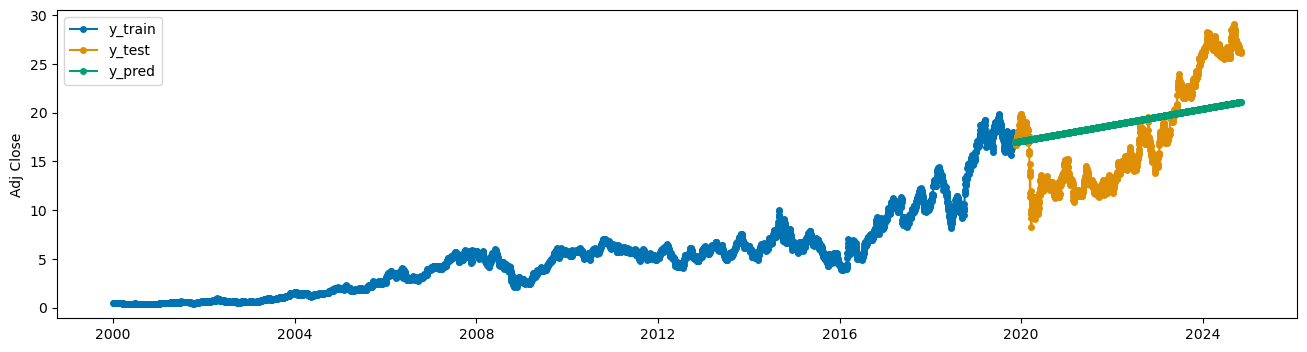

In [10]:
model = AutoARIMA(n_fits=50)

y_test_pred = SKTimeForecaster().train_model(y_train, model, evaluate=True, y_test=y_test, horizon=len(y_test))

plot_series(y_train, y_test, y_test_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

c:\Users\ubfil\anaconda3\envs\stocks_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ubfil\anaconda3\envs\stocks_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ubfil\anaconda3\envs\stocks_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ubfil\anaconda3\envs\stocks_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


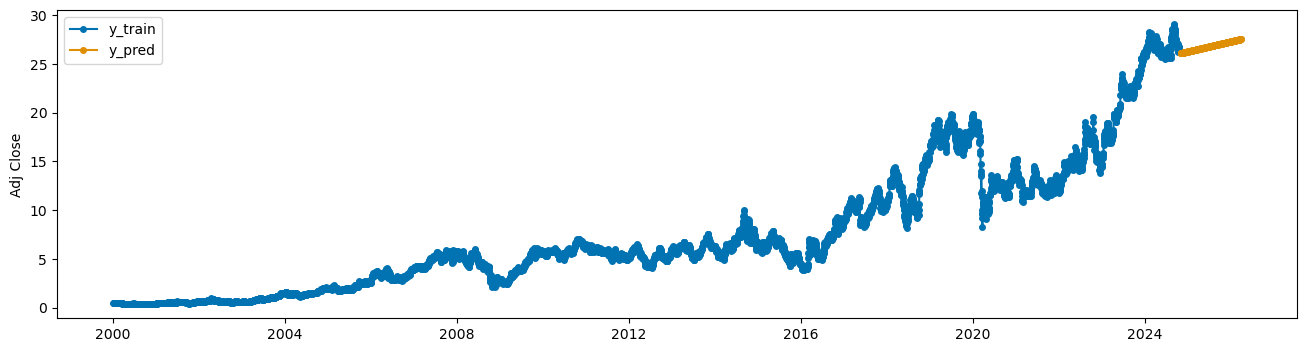

In [11]:
model = AutoARIMA()
 
y_pred = SKTimeForecaster().train_model(df['Adj Close'], model, horizon=365)

plot_series(df['Adj Close'], y_pred, labels=['y_train', 'y_pred'])
plt.show()

## Supervised Learning Algorithms

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction
from sklearn.model_selection import train_test_split

from sktime.datasets import load_airline
from sktime.split import temporal_train_test_split
from sktime.utils.plotting import plot_series
from xgboost import XGBRegressor


In [13]:
regressor = XGBRegressor(n_estimators=1000)
forecaster = make_reduction(regressor, window_length=4, strategy="recursive")

In [14]:
forecaster

RecursiveTabularRegressionForecaster(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...),
                                     window_length=4)

0.2779064388640976

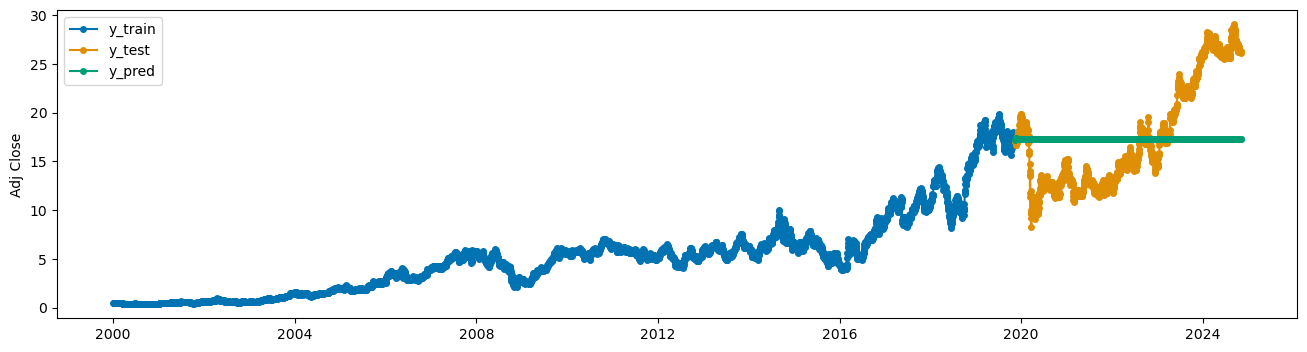

In [15]:
forecaster.fit(y_train)
fh = ForecastingHorizon(np.arange(1, len(y_test) + 1))
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

## Prophet

20:38:56 - cmdstanpy - INFO - Chain [1] start processing
20:38:57 - cmdstanpy - INFO - Chain [1] done processing


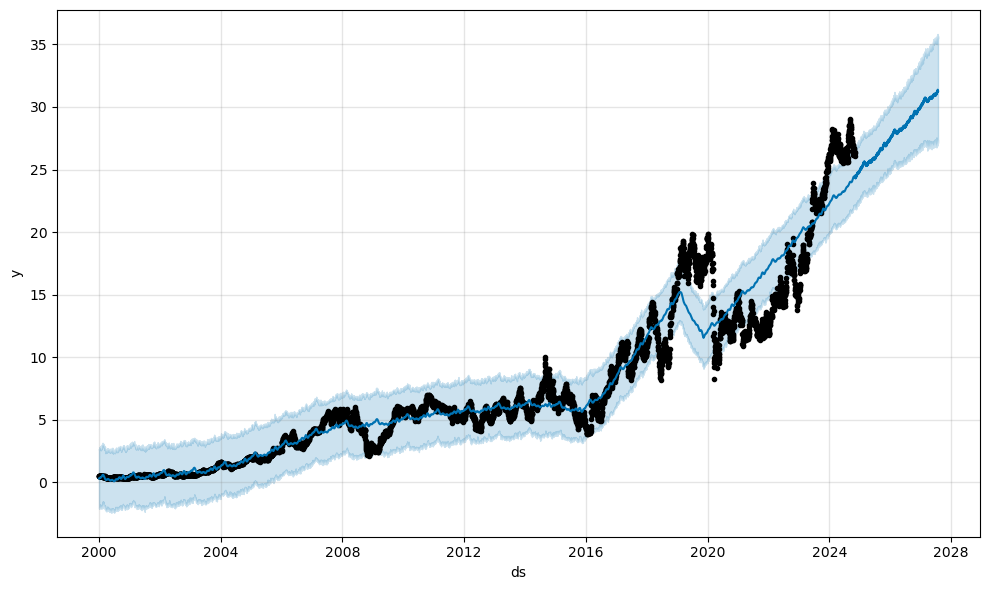

In [18]:
# transformando o dataframe para o formato do Prophet
df_prophet = df.reset_index()
df_prophet.columns = ['ds', 'y']

# Remove timezone information
df_prophet['ds'] = df_prophet['ds'].dt.tz_localize(None)

m = Prophet()

m.fit(df_prophet)

# Create a future dataframe
future = m.make_future_dataframe(periods=1000)

# Make predictions
forecast = m.predict(future)

# Plot the forecast
fig = m.plot(forecast)
plt.show()

In [25]:
forecast

,Adj Close
Date,
2000-01-03,0.303709
2000-01-04,0.318855
2000-01-05,0.327681
2000-01-06,0.336022
2000-01-07,0.347690
...,...
2027-07-25,31.377868
2027-07-26,31.219112
2027-07-27,31.235701


In [ ]:
forecast = forecast[['ds', 'yhat']]
forecast = forecast.rename(columns={'yhat': 'Adj Close', 'ds': 'Date'})

KeyError: "None of [Index(['ds', 'yhat'], dtype='object')] are in the [columns]"

In [24]:
forecast = forecast.set_index('Date')